In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Importing the Data

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [3]:
df=pd.read_csv(filepath,header=None)

Assigning columns name

In [4]:
df.columns=["Age","Gender","BMI","No_children","Smoker","region","Charges"]

# DATA CLEANING

In [5]:
df['Age'].replace("?",np.NaN,inplace=True)


In [6]:
df['Smoker'].replace("?",np.NaN,inplace=True)

In [7]:
mean=df['Age'].astype(float).mean()

In [8]:
df['Age'].replace(np.NaN,mean,inplace=True)

In [9]:
mode=df['Smoker'].value_counts().idxmax()

In [11]:
df['Smoker'].replace(np.NaN,mode,inplace=True)

In [12]:
df[['Age','Smoker']]=df[['Age','Smoker']].astype(int)

In [14]:
df[["Charges"]] = np.round(df[["Charges"]],2)
print(df.head())

   Age  Gender     BMI  No_children  Smoker  region   Charges
0   19       1  27.900            0       1       3  16884.92
1   18       2  33.770            1       0       4   1725.55
2   28       2  33.000            3       0       4   4449.46
3   33       2  22.705            0       0       1  21984.47
4   32       2  28.880            0       0       1   3866.86


Relation between BMI and Charges

(0.0, 66902.85800000001)

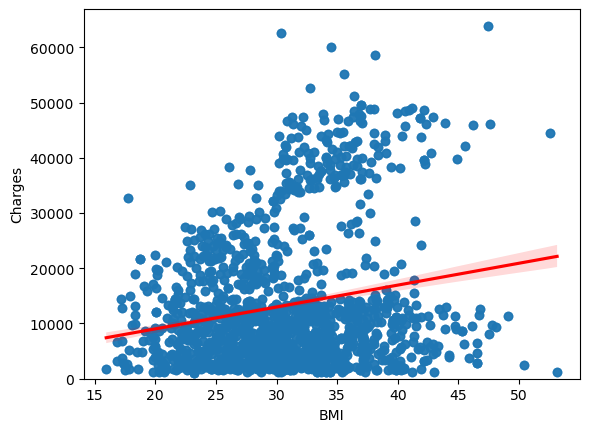

In [15]:
sns.regplot(x="BMI", y="Charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

Distribution of charges for Smoker and Non smoker

<Axes: xlabel='Smoker', ylabel='Charges'>

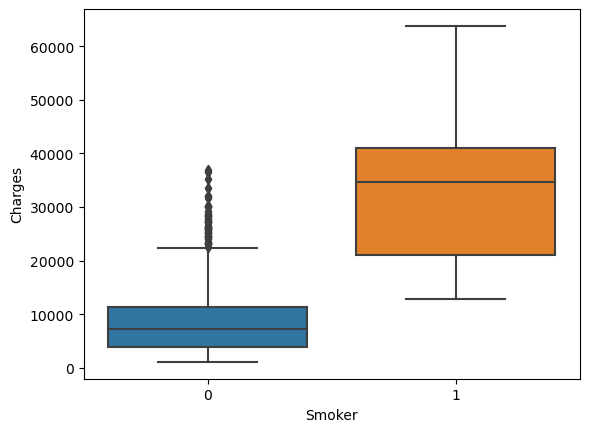

In [16]:
sns.boxplot(x="Smoker", y="Charges", data=df)

Regression model for One variable

In [18]:
X = df[['Smoker']]
Y = df['Charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Regression model for multiple variables

In [21]:
Z = df[["Age", "Gender", "BMI", "No_children", "Smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


# Polynomial Regression model

In [28]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452456286532801


In [29]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

NameError: name 'x_train' is not defined

Model fitting

In [30]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [33]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


In [34]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608153
